In [1]:
import torch
import xlrd
import openpyxl
import pandas as pd
from __future__ import absolute_import, division, print_function, unicode_literals
# TensorFlow и tf.keras

import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

import csv
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Model
from keras.layers import Input, Dense, Concatenate, Flatten, BatchNormalization
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, UpSampling2D, Conv2D, MaxPooling2D, Activation

print(tf.__version__)

2.6.0


In [ ]:
#print("Текущая деректория:", os.getcwd())
os.chdir("tf-gpu/neural") #смена директории
file1 = open("eye.csv", "r")
lines = file1.readlines()
#print(lines)

In [4]:
train = pd.read_csv('3class.csv')

In [5]:
train.head()

,path,classes
0,0.jpg_1.jpg,1
1,0.jpg_2.jpg,1
2,1.jpg_1.jpg,2
3,1.jpg_2.jpg,2
4,100.jpg_1.jpg,2


In [6]:
train.shape

(2380, 2)

In [ ]:
"""from torchvision import transforms  # Здесь можно найти много различных аугументаций
from PIL import Image
import os
os.chdir("neural/classifications/eye") #смена директории
for i in range(0, 1191):
    cl = train.iloc[i, 1]
    p = train.iloc[i, 0]
    path = list(train.iloc[i, 0])
    if (path[1] == '.'):
        n = str(int(path[0])+596) + ".jpg_" + path[6] + ".jpeg "
    if (path[2] == '.'):
        n = str(int(path[0] + path[1])+596) + ".jpg_" + path[7] + ".jpeg "
    if (path[3] == '.'):
        n = str(int(path[0] + path[1] + path [2])+596) + ".jpg_" + path[8] + ".jpeg "
    fields=[n, cl]
    
    #with open(r'eye.csv', 'a', newline = '') as f:
       # writer = csv.writer(f)
       # writer.writerow(fields)
    n = open(n, 'w')
    img = Image.open(p).convert("RGB")
    plt.subplot(244)
    img = transforms.RandomRotation(50)(img)
    plt.imshow(transforms.RandomRotation(50)(img))
    img.save(n, format = 'jpeg')"""

In [8]:
import os #Записала все названия тестовых картинок глаз людей в текстовый файл
os.chdir("neural/test/test_eye") #смена директории
path =  "neural/test/test_eye"
print('Всего каталогов: ',len(os.listdir(path)))
#with open('eye_test.txt','w') as file:
 #   for i in os.listdir(path):
  #      file.write(i+'\n')

Всего каталогов:  604


In [9]:
os.chdir("tf-gpu/neural") #смена директории
test = pd.read_csv('3class_test.csv')

In [10]:
test.head()

,path,classes
0,0.jpg_1.jpg,1
1,0.jpg_2.jpg,1
2,1.jpg_1.jpg,2
3,1.jpg_2.jpg,2
4,10.jpg_1.jpg,1


In [11]:
test.shape

(602, 2)

In [12]:
hei = 64
wei = 64

In [ ]:
"""x_test = []
y_test = []
import os
# вывести текущую директорию
print("Текущая деректория:", os.getcwd())
os.chdir("neural/test/test_eye") #смена директории
p = os.listdir()
for i in range (test.shape[0]):
    x,y = test.values[i]
    x = cv2.imread('neural/test/test_eye/{}'.format(x))
    x = cv2.resize(x, (hei, wei))
    x_test += [x]
    y_test += [y]
x_test = np.array(x_test) / 255.
y_test = np.array(y_test)
x_test.shape"""

In [14]:
#Объявим генератор
def keras_generator(gen_df, batch_size):#генератор картинок в батч (создание батча)
    while True:
        x_train = []
        y_train = []
        

        for i in range (batch_size):

            x,y = train.sample(1).values[0]
            x = cv2.imread('neural/classifications/eye/{}'.format(x))
            #x = strong_aug(p=0.2)
            x = cv2.resize(x, (hei, wei))
            x_train += [x]
            y_train += [y]

        #y_train = keras.utils.to_categorical(y_train,10)
        x_train = np.array(x_train) / 255.
        y_train = np.array(y_train)

        yield x_train, y_train

In [15]:
#Объявим тестовый генератор
def keras_generator_test(gen_df, batch_size):#генератор картинок в батч (создание батча)
    while True:
        x_test = []
        y_test = []
        

        for i in range (batch_size):
            x,y = test.values[i]
            x = cv2.imread('neural/test/test_eye/{}'.format(x))
            x = cv2.resize(x, (hei, wei))
            x_test += [x]
            y_test += [y]
        
        #y_train = keras.utils.to_categorical(y_train,10)
        x_test = np.array(x_test) / 255.
        y_test = np.array(y_test)

        yield x_test, y_test

In [16]:
inp = Input(shape=(wei, hei, 3))

x = Conv2D(32, (3, 3), padding='same')(inp)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)
x = Dropout(0.2)(x)

x = Conv2D(64, (3, 3), padding='same')(inp)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)
x = Dropout(0.2)(x)

x = Conv2D(128, (3, 3), padding='same')(inp)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)
x = Dropout(0.2)(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)

x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)

x = Dense(3, activation='softmax')(x)
model = Model(inputs=inp, outputs=x)

In [37]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
train.dtypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   path     2380 non-null   object
 1   classes  2380 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 37.3+ KB


In [39]:
from tensorflow.keras.models import load_model
model = load_model('classification_3class_2res.h5') #загрузка нейросети из файла

In [41]:
batch_size = 64
model.fit(keras_generator(train, batch_size),
              steps_per_epoch=100,#каждую эпоху - 100 батчей
              epochs=2,
              verbose=1,#будем выводить результат
              validation_data=keras_generator_test(test, batch_size),
              validation_steps=600,
              shuffle=True)

Epoch 1/2
100/100 [==============================] - 121s 1s/step - loss: 0.0456 - accuracy: 0.9834 - val_loss: 2.8516 - val_accuracy: 0.4844
Epoch 2/2
100/100 [==============================] - 120s 1s/step - loss: 0.0527 - accuracy: 0.9808 - val_loss: 1.8719 - val_accuracy: 0.6094


In [42]:
for x_train,y_train in keras_generator(train,train.shape[0]):
    break
for x_test, y_test in keras_generator_test(test, test.shape[0]):
    break

In [82]:
train_loss, train_acc = model.evaluate(x_train, y_train)

print('\nТочность на обучающих данных:', train_acc)
print('\nОшибка на обучающих данных:', train_loss)

75/75 [==============================] - 6s 72ms/step - loss: 0.1428 - accuracy: 0.9450

Точность на обучающих данных: 0.944957971572876

Ошибка на обучающих данных: 0.14277732372283936


In [83]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('\nТочность на проверочных данных:', test_acc)
print('\nОшибка на проверочных данных:', test_loss)

19/19 [==============================] - 2s 94ms/step - loss: 2.0057 - accuracy: 0.5399

Точность на проверочных данных: 0.539867103099823

Ошибка на проверочных данных: 2.0056564807891846


In [ ]:
#print("Текущая деректория:", os.getcwd())
model.save('classification_3class_2res.h5') #сохранение нейросети в файл

In [29]:
from tensorflow.keras.models import load_model
os.chdir("tf-gpu/neural") #смена директории
model = load_model('classification_3class.h5') #загрузка нейросети из файла

pred = model.predict(x_test) #предсказание
print(pred)
print(y_test[7])

[[2.2714157e-03 9.1738009e-01 8.0332272e-02 1.6162772e-05]
 [4.1716914e-03 2.4847408e-01 7.4735308e-01 1.0584139e-06]
 [2.2499228e-03 8.1413674e-01 1.8360648e-01 6.8207337e-06]
 ...
 [1.3494309e-03 5.1335420e-04 9.9813724e-01 8.9648031e-09]
 [2.6133573e-03 2.4906497e-02 9.7247994e-01 2.1094263e-07]
 [2.9634277e-03 4.0505692e-01 5.9197861e-01 1.0387753e-06]]
2


In [43]:
pred = model.predict(x_test)

In [44]:
pred2 = model.predict(x_train)

In [45]:
pred.shape

(602, 3)

In [46]:
pred2.shape

(2380, 3)

In [47]:
z = 0
zz = 0
g = 0
gg = 0
c = 0
cc = 0
e = 0
for i in range(602):
    if(y_test[i] == 0): 
        z+=1
        if (np.argmax(pred[i]) == y_test[i]): # то, что предсказывается, то, что на самом деле
                zz+=1  
                e+=1
    elif(y_test[i] == 1): 
        g+=1
        if (np.argmax(pred[i]) == y_test[i]): # то, что предсказывается, то, что на самом деле
                gg+=1
                e+=1
    elif(y_test[i] == 2): 
        c+=1
        if (np.argmax(pred[i]) == y_test[i]): # то, что предсказывается, то, что на самом деле
                cc+=1
                e+=1
print("Зеленых всего ", z, "\nИз них угадано: ", zz)
print("Карих всего ", c, "\nИз них угадано: ", cc)
print("Голубых всего ", g, "\nИз них угадано: ", gg)
print("Всего правильных: ", c)

Зеленых всего  38 
Из них угадано:  8
Карих всего  310 
Из них угадано:  165
Голубых всего  254 
Из них угадано:  215
Всего правильных:  310


In [48]:
z = 0
zz = 0
g = 0
gg = 0
c = 0
cc = 0
for i in range(2380):
    if(y_train[i] == 0): 
        z+=1
        if (np.argmax(pred2[i]) == y_train[i]): # то, что предсказывается, то, что на самом деле
                zz+=1  
    elif(y_train[i] == 1): 
        g+=1
        if (np.argmax(pred2[i]) == y_train[i]): # то, что предсказывается, то, что на самом деле
                gg+=1
    elif(y_train[i] == 2): 
        c+=1
        if (np.argmax(pred2[i]) == y_train[i]): # то, что предсказывается, то, что на самом деле
                cc+=1
print("Зеленых всего ", z, "\nИз них угадано: ", zz)
print("Карих всего ", c, "\nИз них угадано: ", cc)
print("Голубых всего ", g, "\nИз них угадано: ", gg)

Зеленых всего  207 
Из них угадано:  201
Карих всего  913 
Из них угадано:  856
Голубых всего  1260 
Из них угадано:  1183


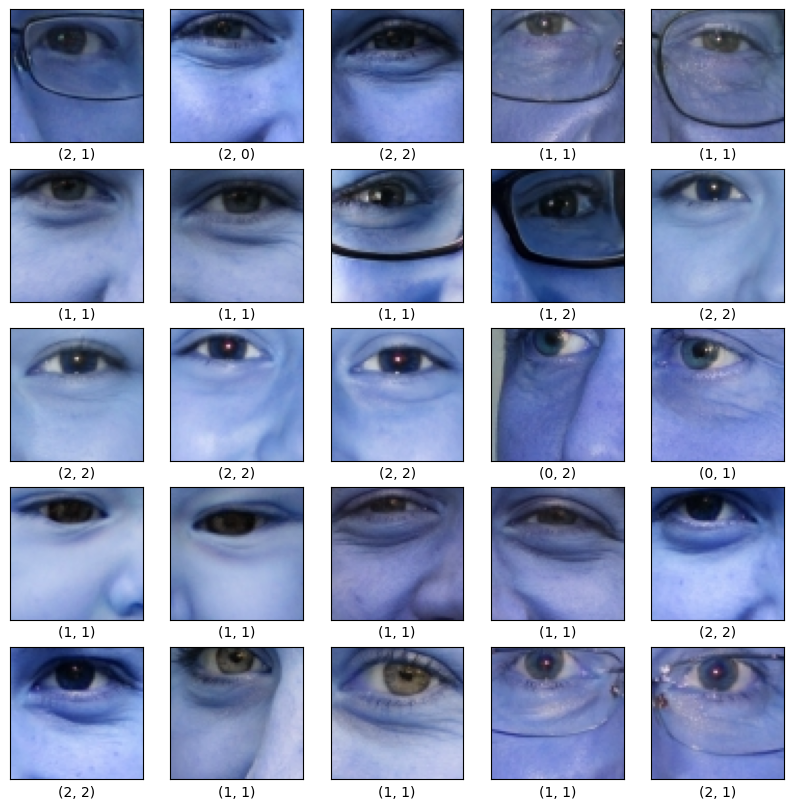

In [35]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #img = cv2.cvtColor(x_test[i+25], cv2.COLOR_BGR2RGB)
    #print(y_test[i+25])
    plt.imshow(x_test[i+25])
    plt.xlabel((y_test[i+25],np.argmax(pred[i+25])))
plt.show()


Pred_img_1:  0
True:  2
Pred_img_2:  0
True:  2


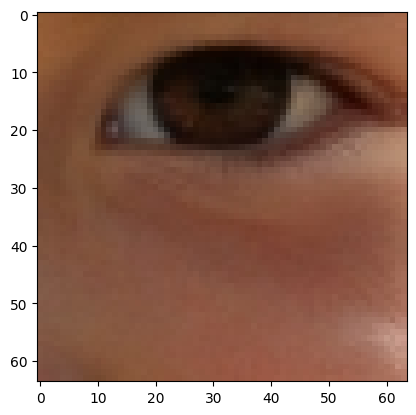

In [38]:
import os
import cv2
img_path = cv2.imread('neural/test/8.jpg')
img = cv2.cvtColor(img_path, cv2.COLOR_BGR2RGB)
plt.imshow(img)
print()
img_path_1 = cv2.imread('neural/test/test_eye/8.jpg_1.jpg')
img1 = cv2.cvtColor(img_path_1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
img1 = cv2.resize(img1, (hei, wei)) / 255.
pred_img_1 = model.predict(img1.reshape(1,wei,hei,3))
print('Pred_img_1: ',np.argmax(pred_img_1))
print ('True: ', y_test[558])

img_path_2 = cv2.imread('neural/test/test_eye/8.jpg_2.jpg')
img2 = cv2.cvtColor(img_path_2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
img2 = cv2.resize(img2, (hei, wei)) / 255.
pred_img_2 = model.predict(img2.reshape(1,wei,hei,3))
print('Pred_img_2: ',np.argmax(pred_img_2))
print ('True: ', y_test[559])